# Data exploratory analysis focused on lightning systems 

In [2]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
# Main functions
if 'df' not in locals(): 
    df = pd.DataFrame() # Necessary for the inicialization of get_house_data

# Get measurements for a given house_id
def get_house_data(df, house_id, start=0, ending=len(df), features=df.columns, sampl_rate=1):
    '''Returns a dataframe for a given house_id'''
    house_data = df[df['dataid']==house_id][features][start:ending:sampl_rate]*1000
    return house_data

def get_house_data_dataid(df, house_id, start=0, ending=len(df), features=df.columns, sampl_rate=1):
    '''Returns a dataframe for a given house_id'''
    house_data = df[df['dataid']==house_id][features][start:ending:sampl_rate]*1000
    house_data.localminute = house_data.localminute.apply(lambda x: x[:-3])
    house_data.localminute = pd.to_datetime(house_data['localminute'])
    house_data.set_index('localminute') 
    return house_data

# Plot house daily profile
def house_plot(df, house_id, day_start, day_end, feature='use'):    
    plt.figure(figsize=(16,10))
    house_data = get_house_data(df, house_id, features=feature)
    plt.plot(house_data[1440*day_start:1440*day_end])
    plt.show()

def heatmap_plot(df, house_id, s_rate=1):
    house_data = get_house_data(df, house_id, start=0, ending=-1, features='use', sampl_rate=s_rate)
    matrix = house_data.values.reshape(367, 1440/s_rate)
    fig = plt.figure(figsize=(16,100))
    ax = plt.axes()
    sns.heatmap(matrix, cbar=False, cmap='plasma', ax=ax)
    ax.set_title("House ID: {}".format(house_id), fontdict={'fontsize': 16})
    

In [4]:
# Read datasets
files = ['dataport-light-2016.csv', 'dataport-light-2016-2.csv']
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

In [ ]:
df.set_index()

In [65]:
df.head()

,localminute,dataid,use,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6
0,2016-01-01 00:00:00-06,624,0.284,0.008,0.004,0.104,0.0,0.000,0.000
1,2016-01-01 00:00:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
2,2016-01-01 00:01:00-06,624,0.292,0.008,0.004,0.112,0.0,0.000,0.000
3,2016-01-01 00:01:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
4,2016-01-01 00:02:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007


It is not clear if the first sample was acquired at midnight or at (midnight - 6 hours) = 6PM

## Plot daily profile

In [6]:
# Input parameters
house_id = 9085
day_start = 8
day_end = 9

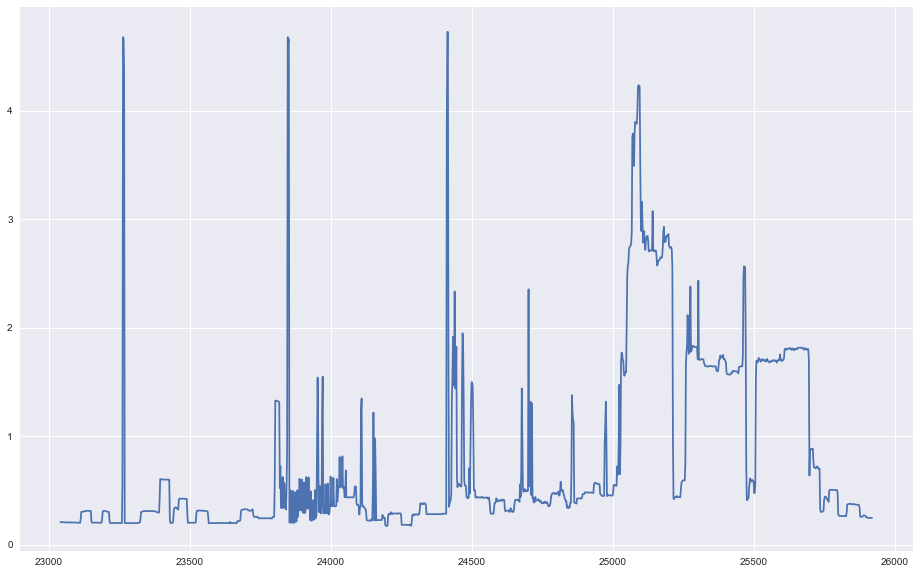

In [16]:
house_plot(df, house_id, day_start, day_end)

## Heatmap plot

In [88]:
# Input parameters
house_ids = set(df['dataid'])
print house_ids

set([77, 624, 86, 26, 59, 9085])


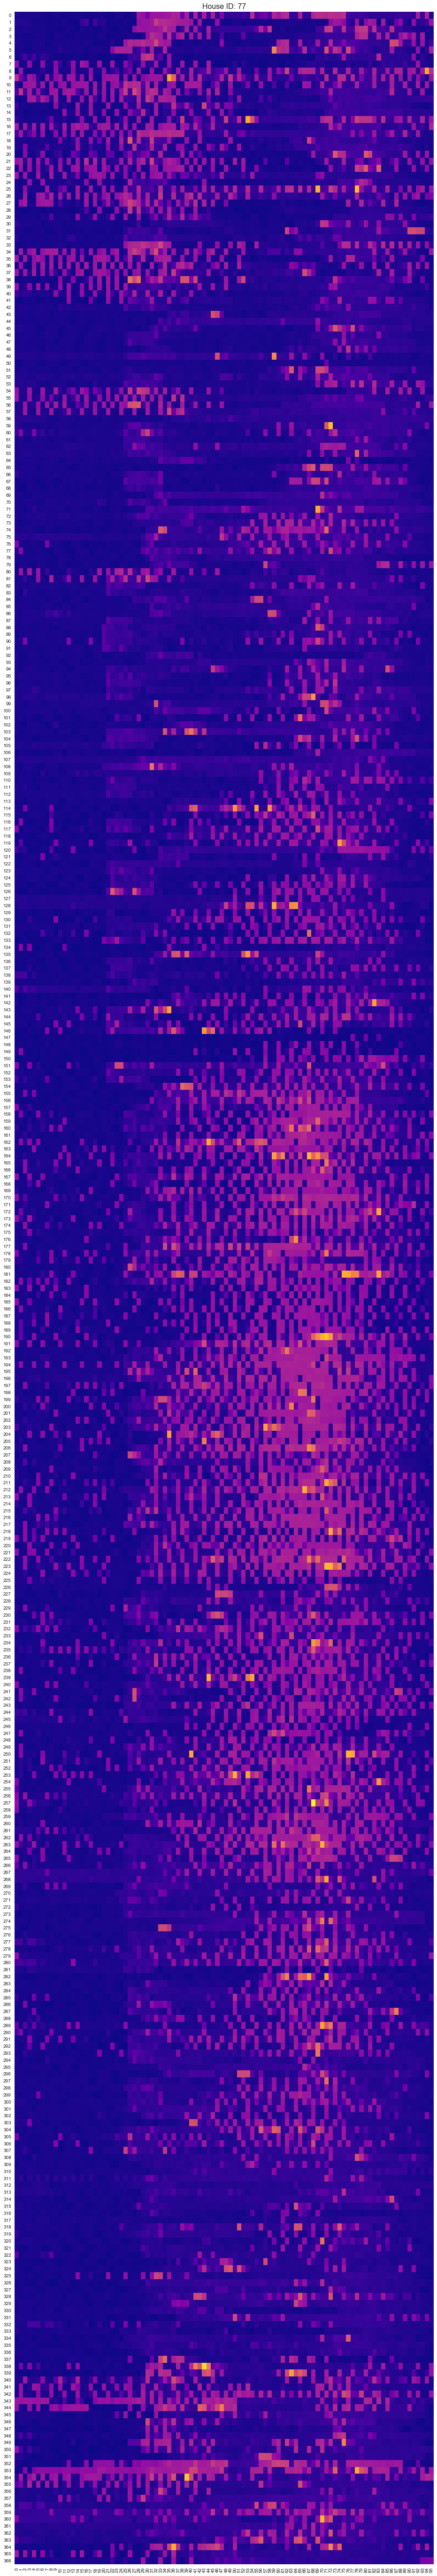

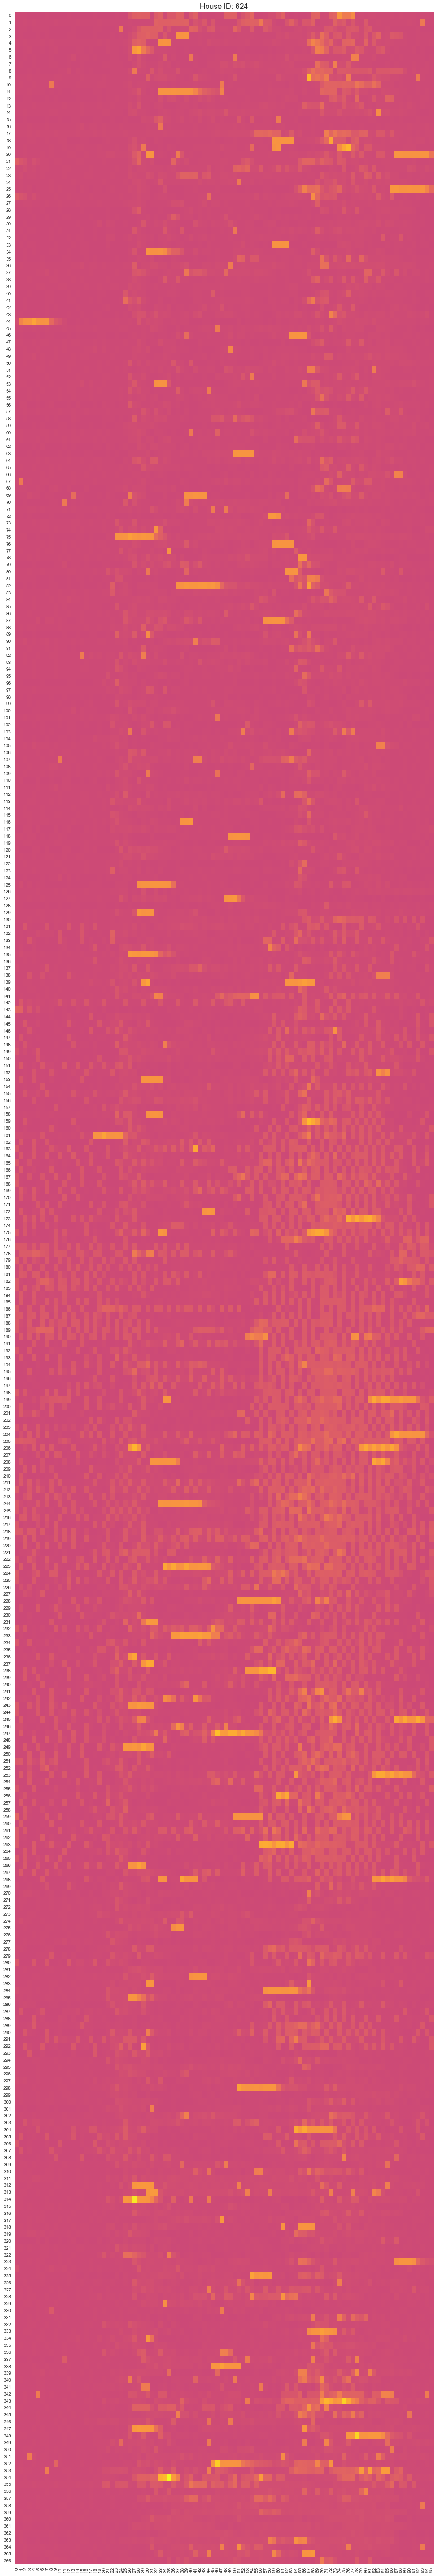

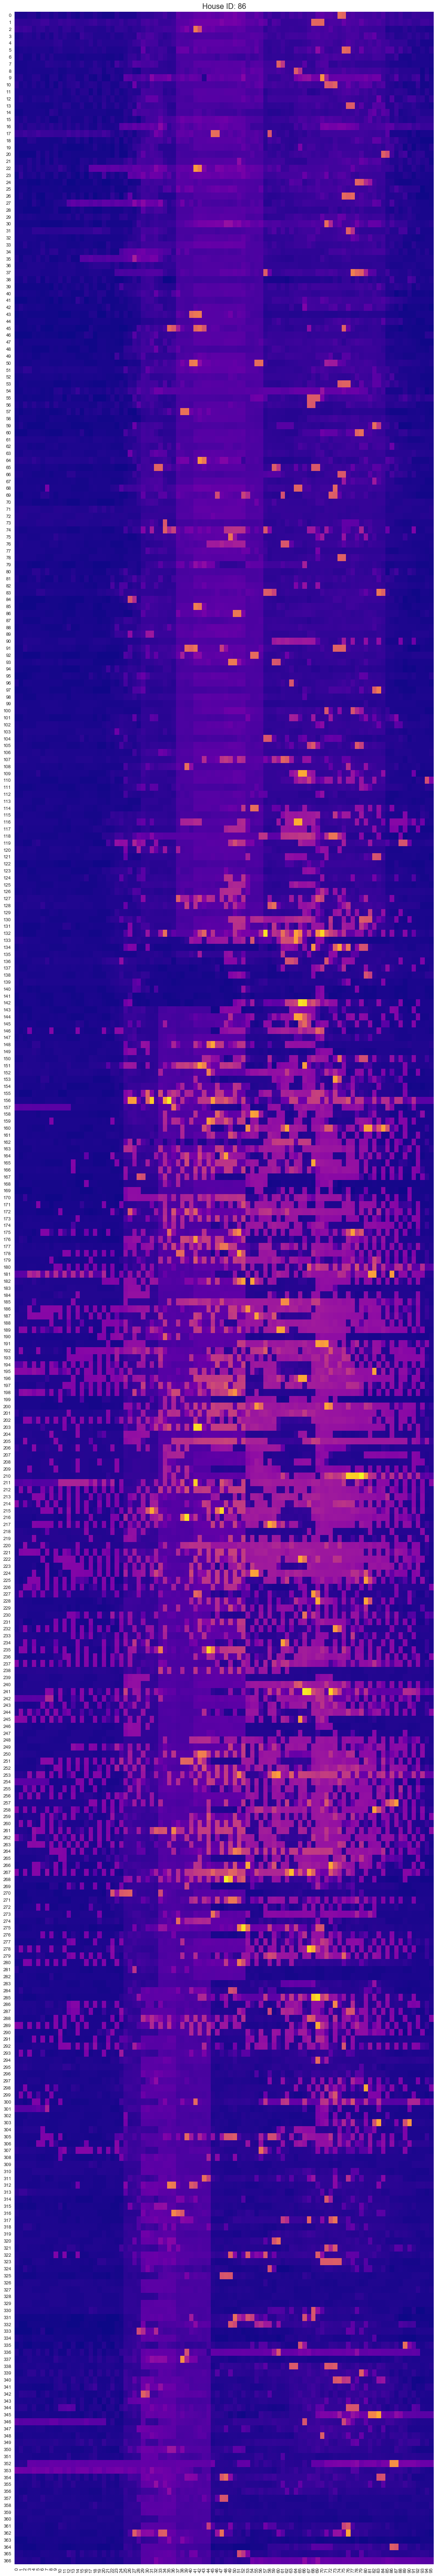

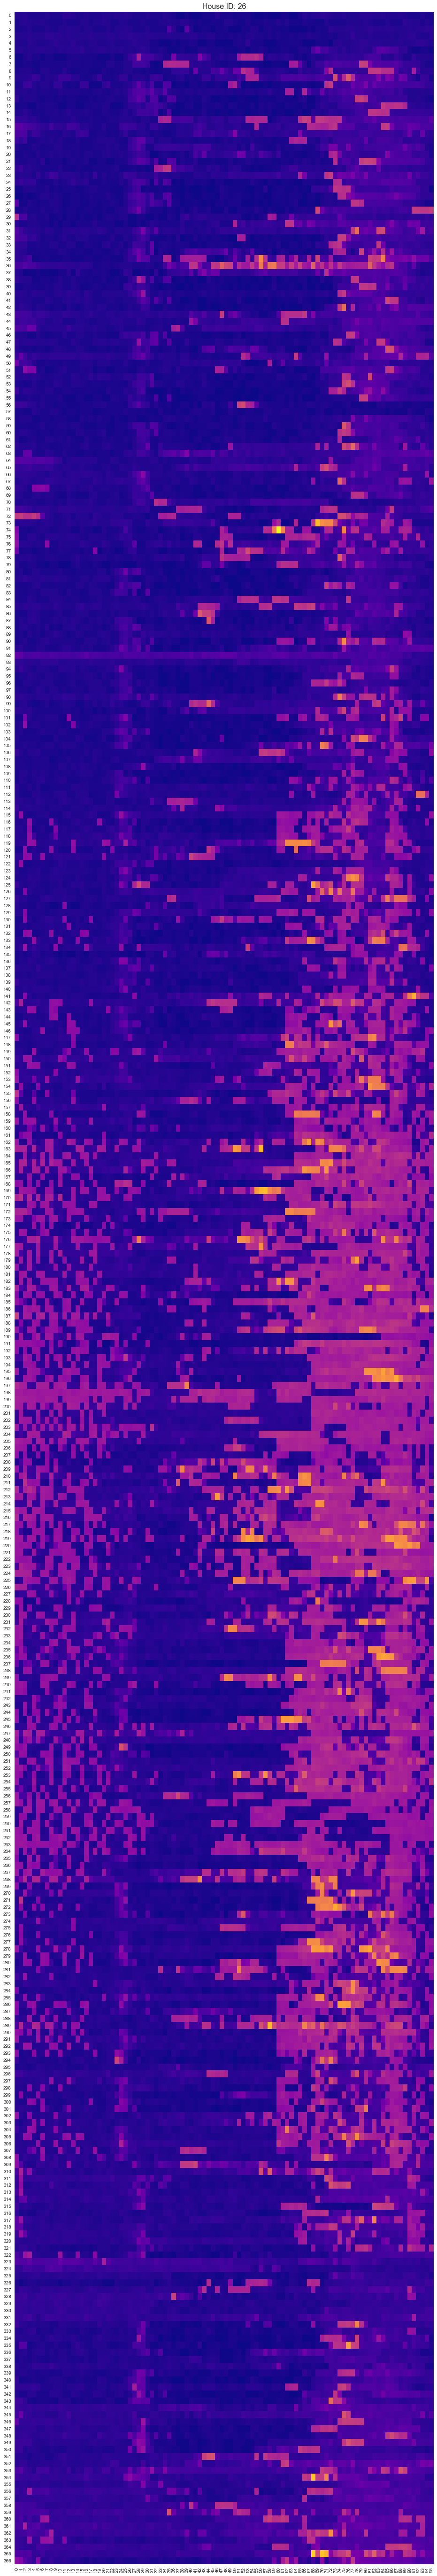

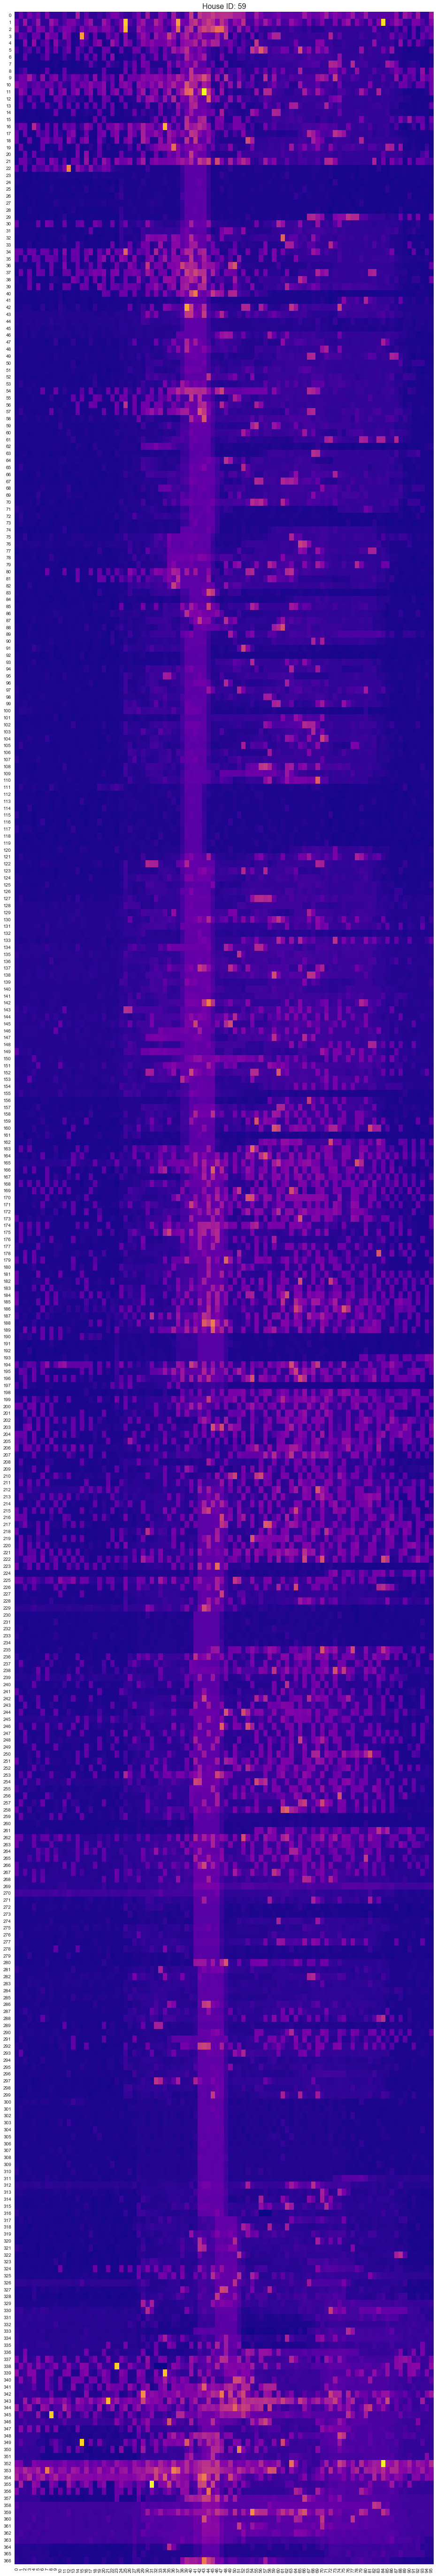

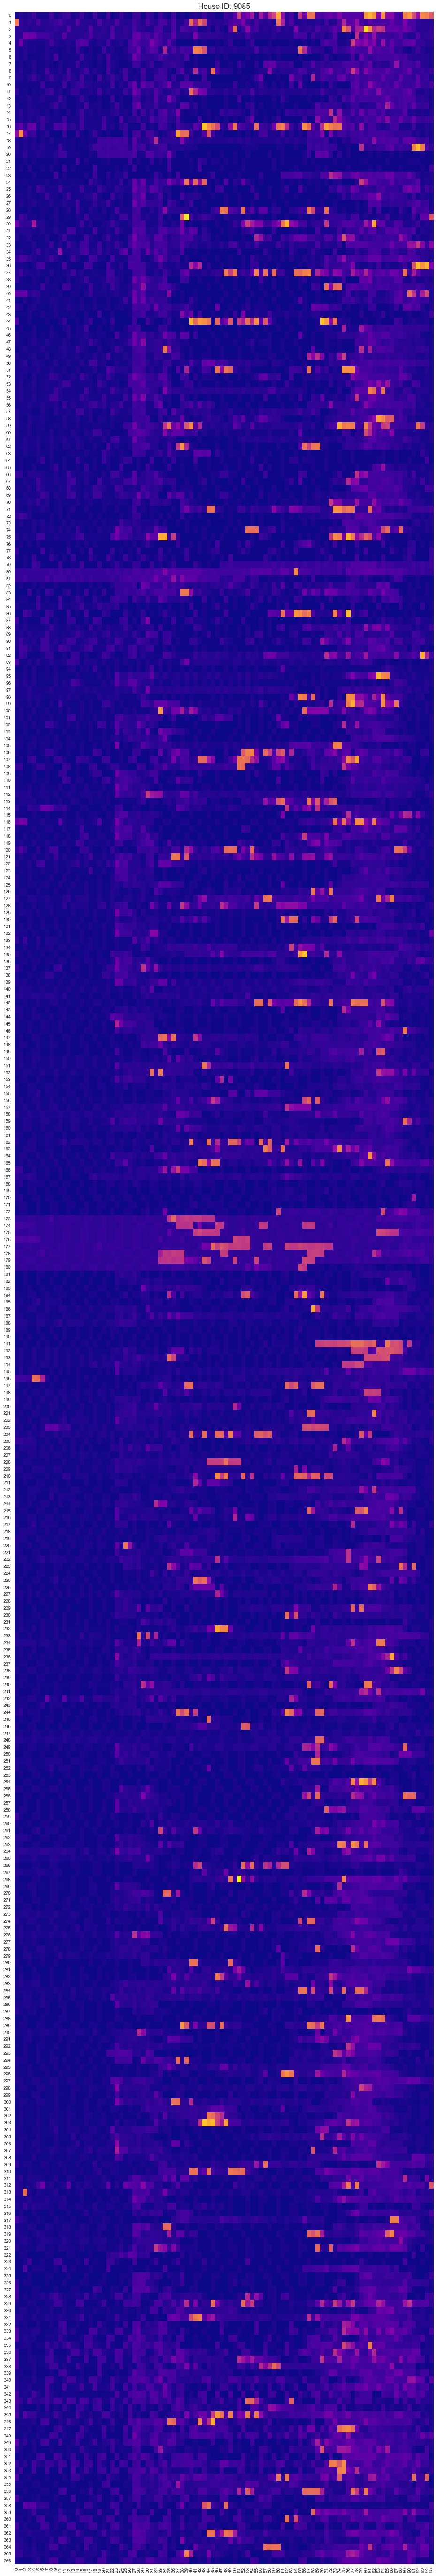

In [89]:
for h_id in house_ids:
    heatmap_plot(df, h_id, s_rate=15)

### Individiual Lightning profile

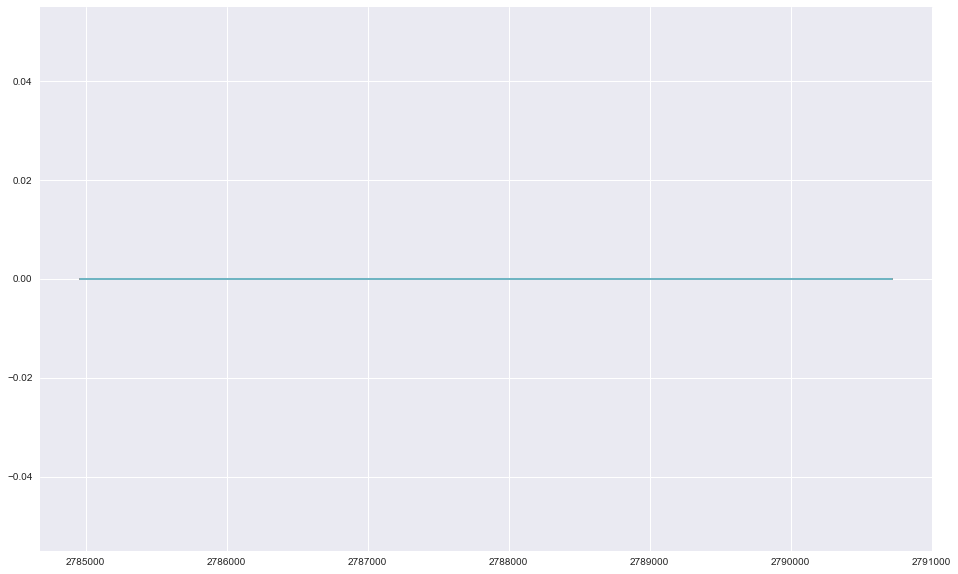

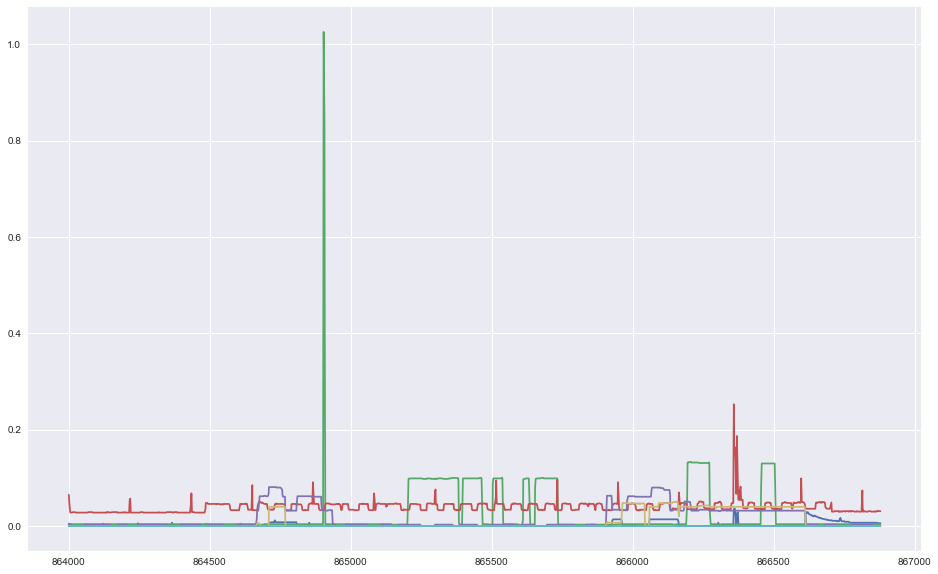

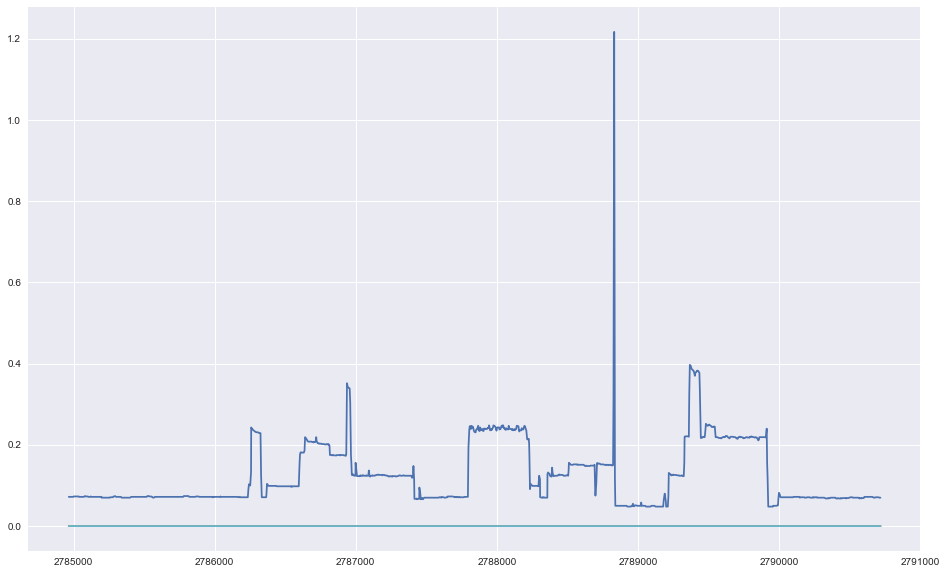

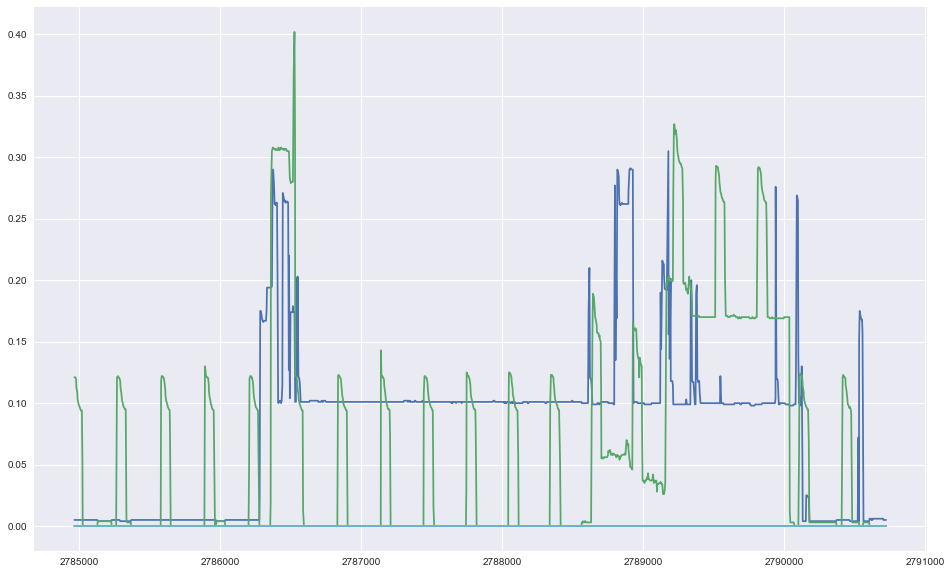

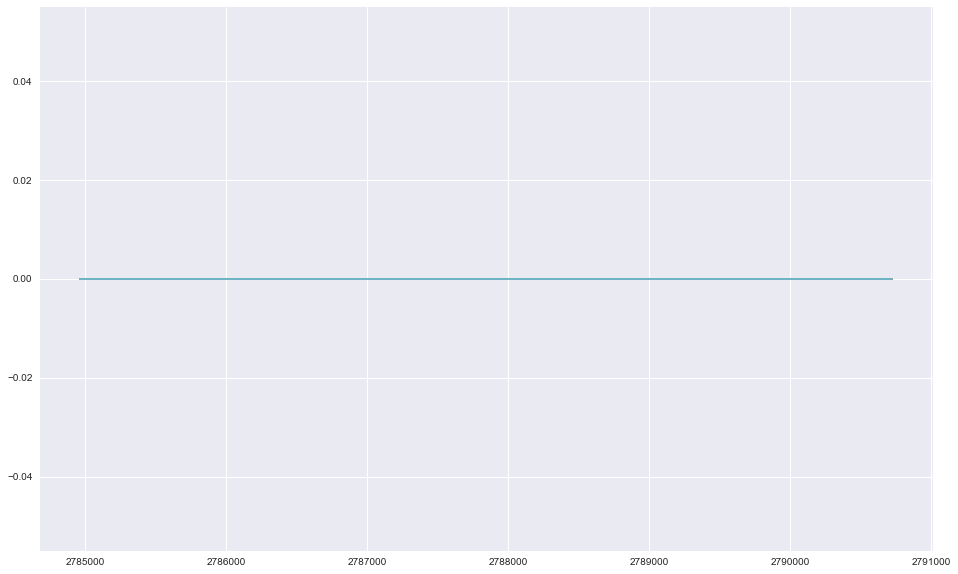

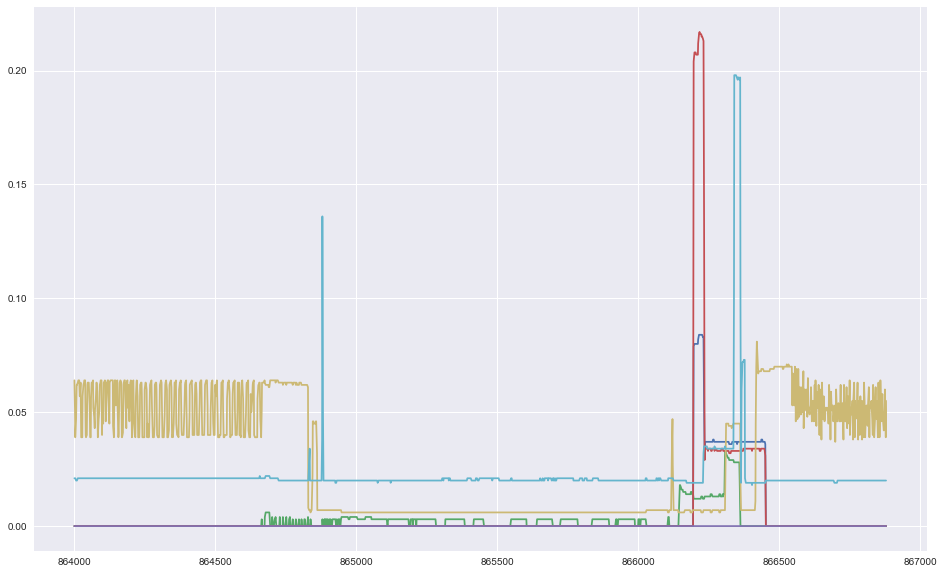

In [110]:
# Input parameters
#house_id = 9085
day_start = 300
day_end = 301

for house_id in house_ids:
    house_plot(df, house_id, day_start, day_end, feature=['lights_plugs1', 'lights_plugs2','lights_plugs3','lights_plugs4', 'lights_plugs5', 'lights_plugs6'])

### Lighting histograms

In [5]:
set(df.dataid)

{26, 59, 77, 86, 624, 9085}

In [6]:
df.head()

,localminute,dataid,use,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6
0,2016-01-01 00:00:00-06,624,0.284,0.008,0.004,0.104,0.0,0.000,0.000
1,2016-01-01 00:00:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
2,2016-01-01 00:01:00-06,624,0.292,0.008,0.004,0.112,0.0,0.000,0.000
3,2016-01-01 00:01:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007
4,2016-01-01 00:02:00-06,9085,0.165,0.003,0.000,0.009,0.0,0.048,0.007


In [31]:
def plot_hist(df, data_id, light_col, min_threshold=0, max_threshold=20000, n_bin=50):
    light = df[df.dataid==data_id][light_col]*1000
    light = light[light>min_threshold][light<max_threshold]
    plt.figure(figsize=(16,10))
    light.hist(bins=n_bin)
    plt.title('Data ID {} and {}'.format(data_id, light_col))
    

Data ID: 77
Data ID: 624
Data ID: 86
Data ID: 26
Data ID: 59
Data ID: 9085


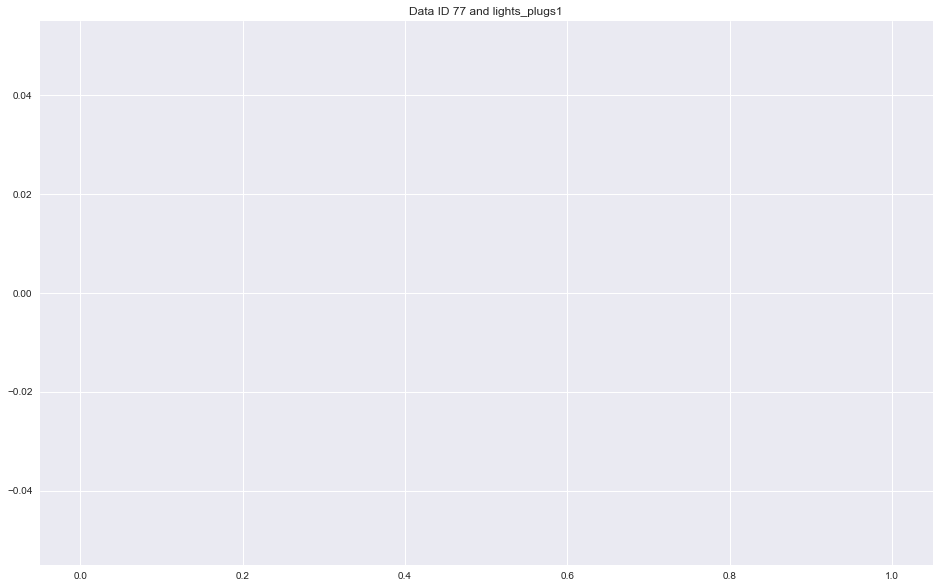

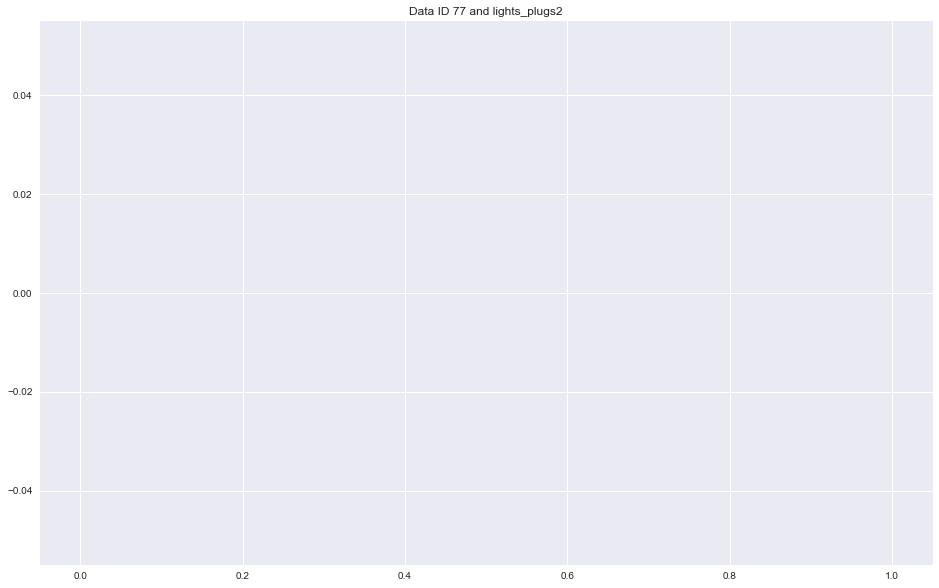

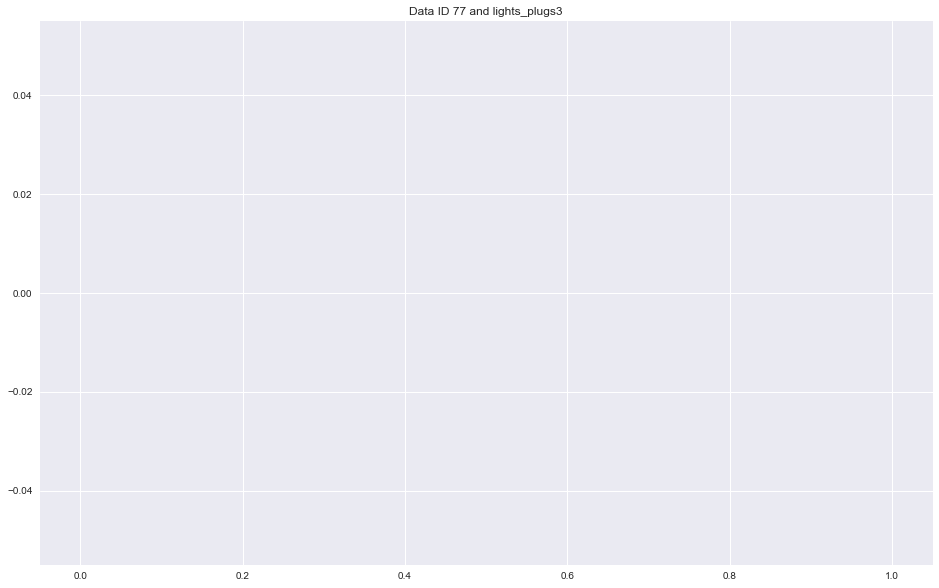

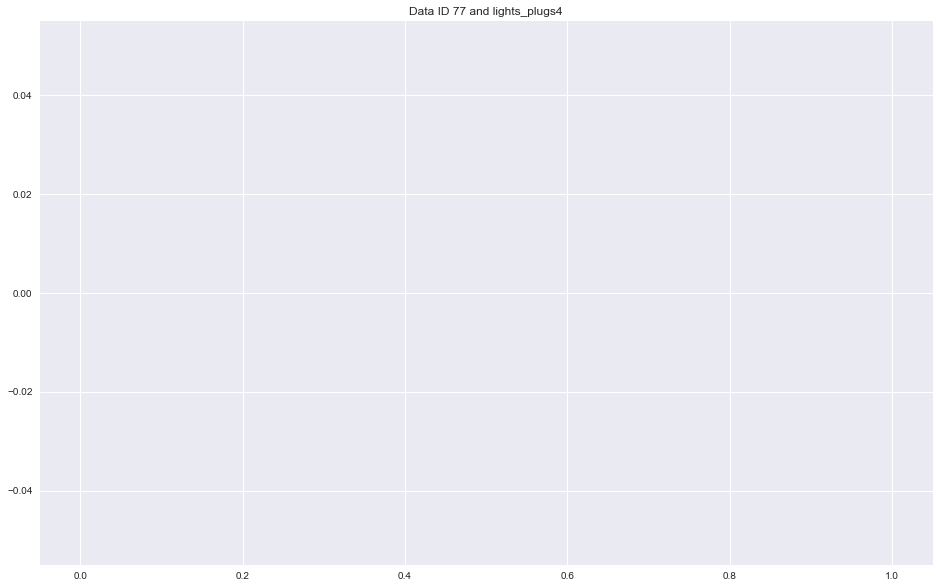

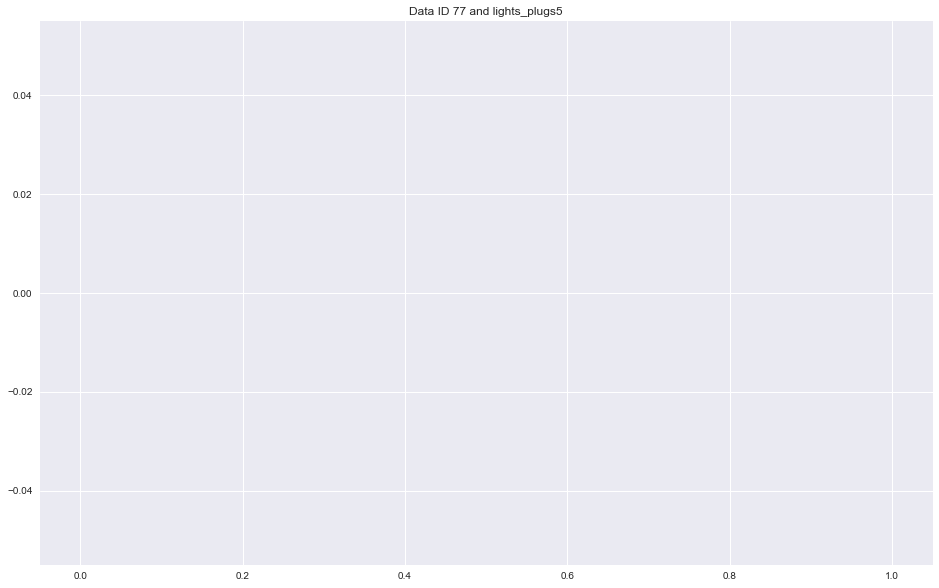

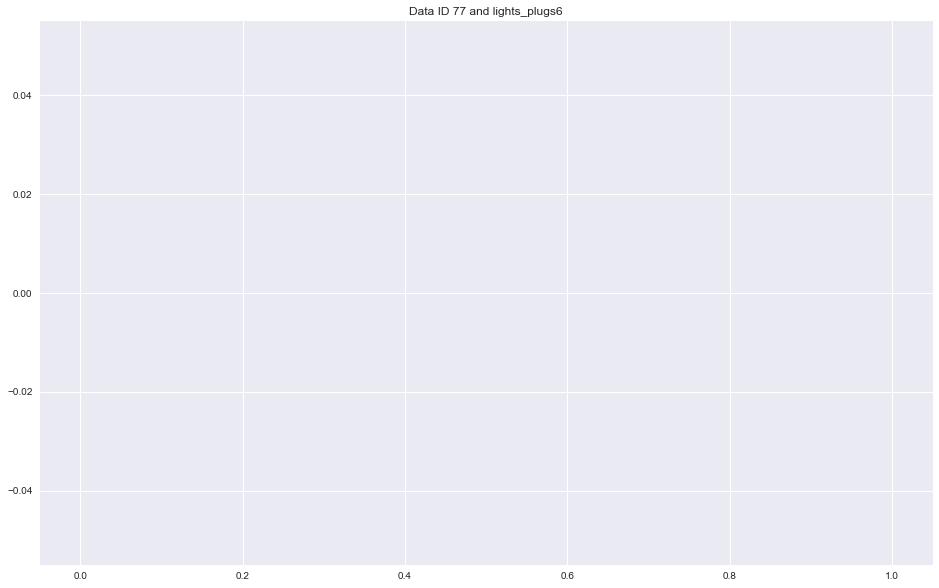

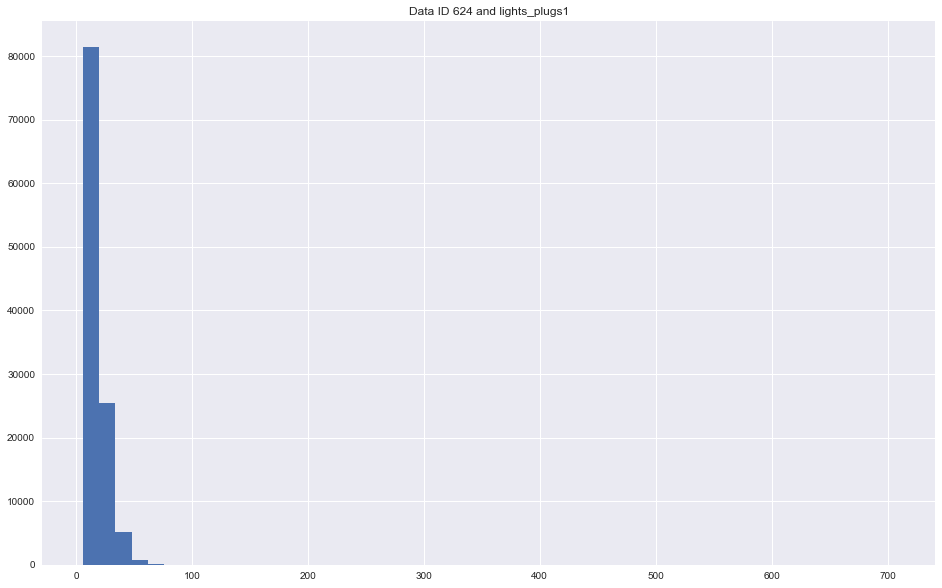

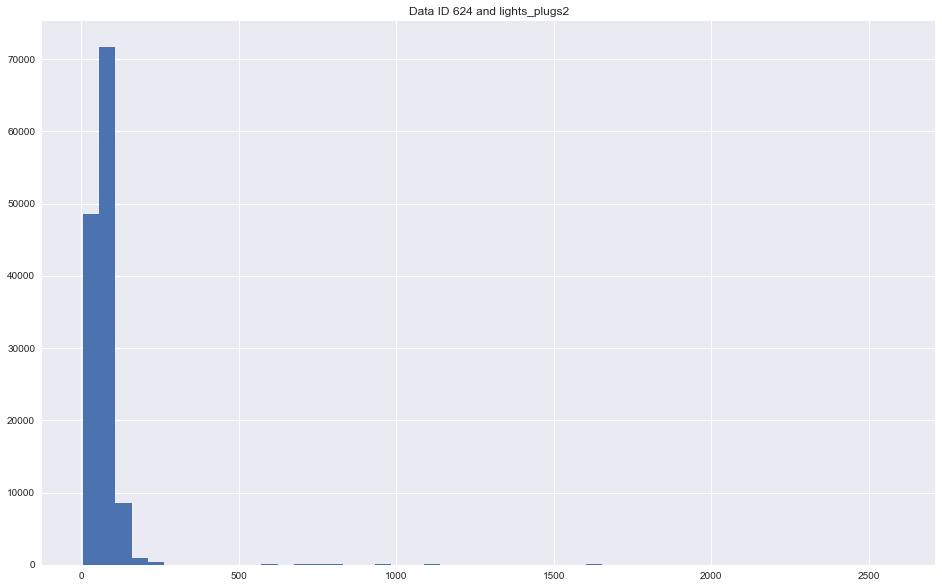

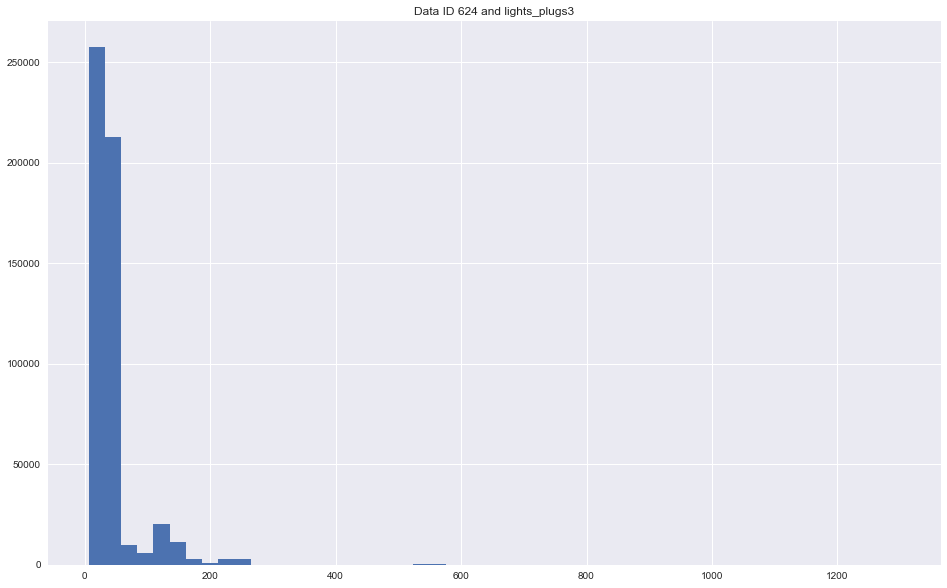

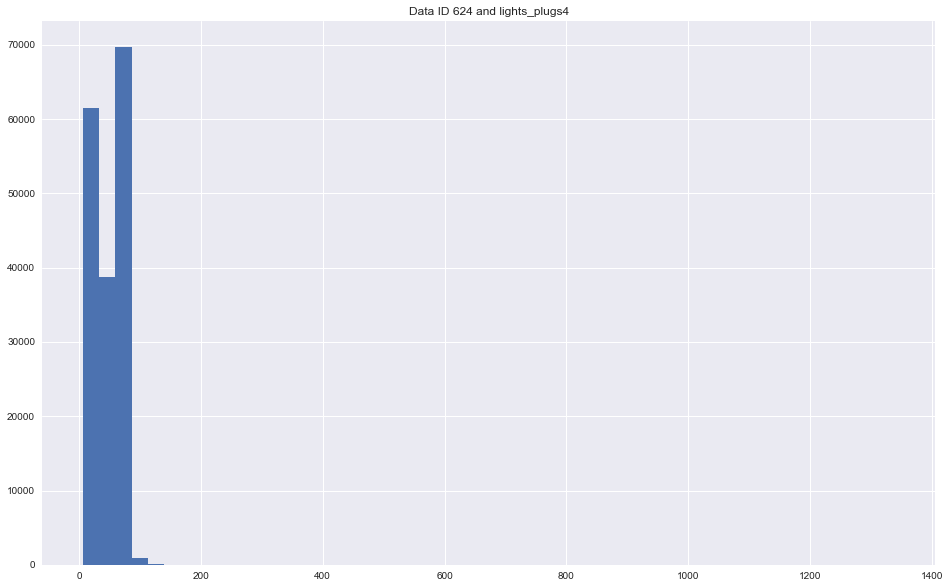

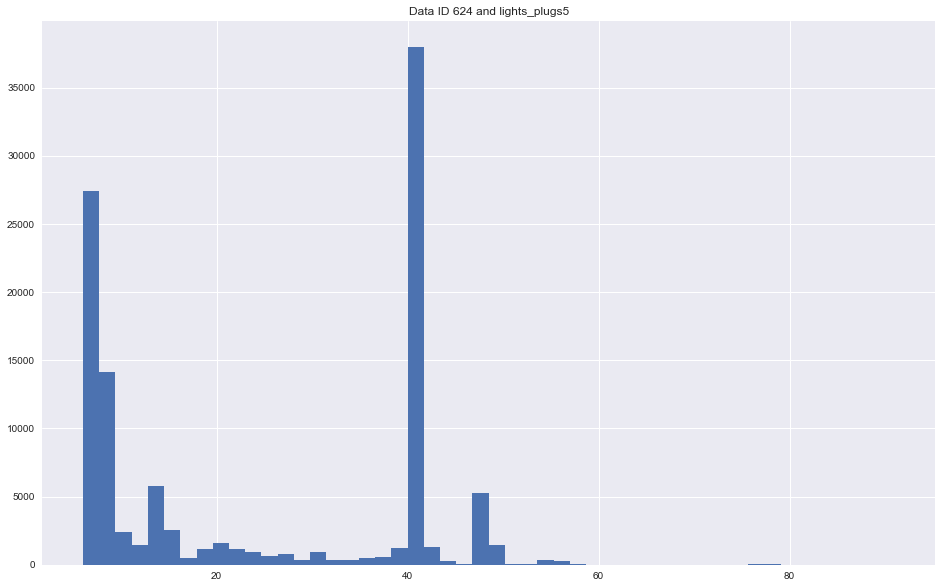

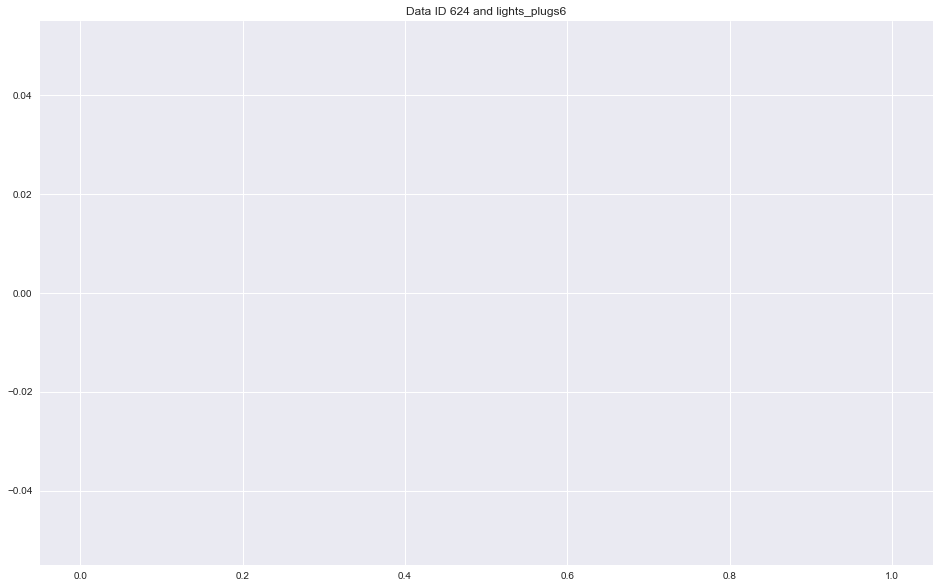

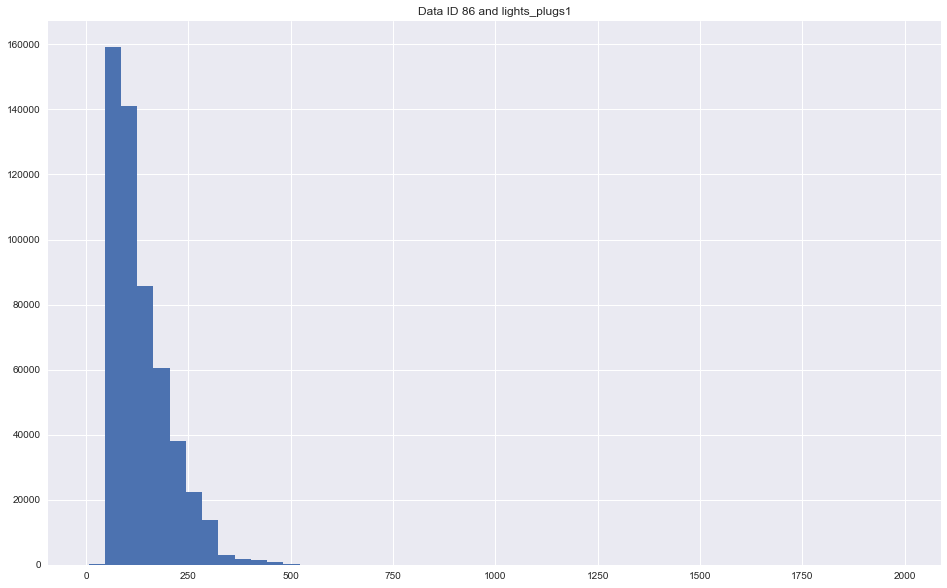

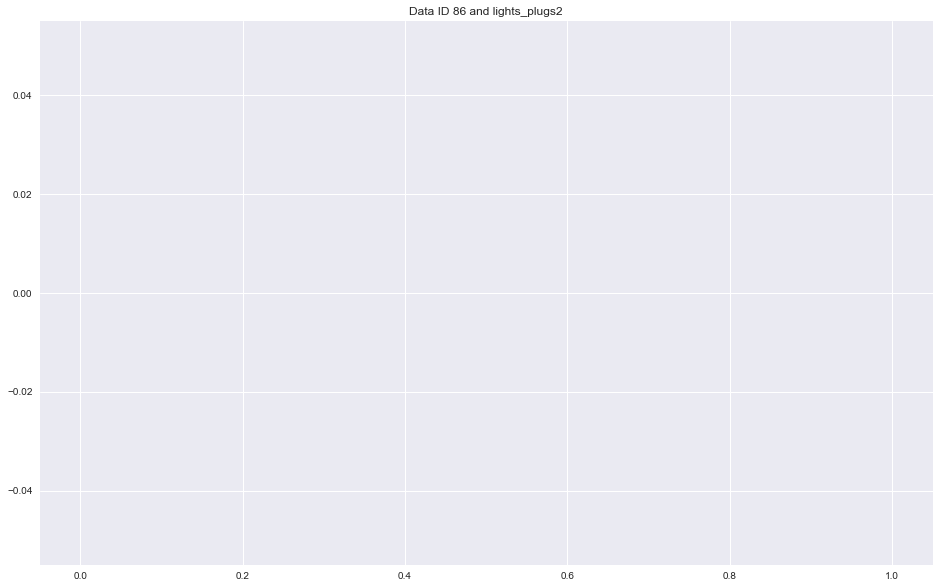

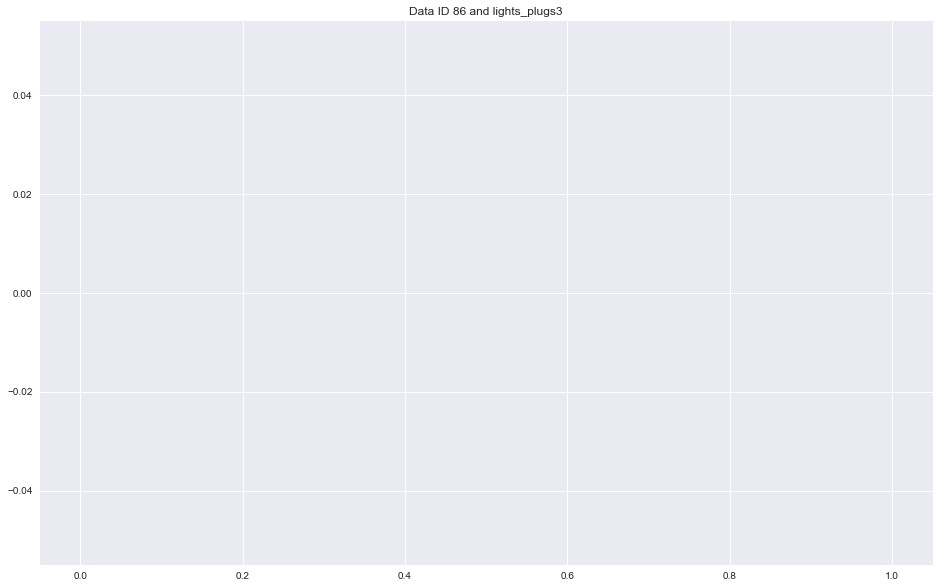

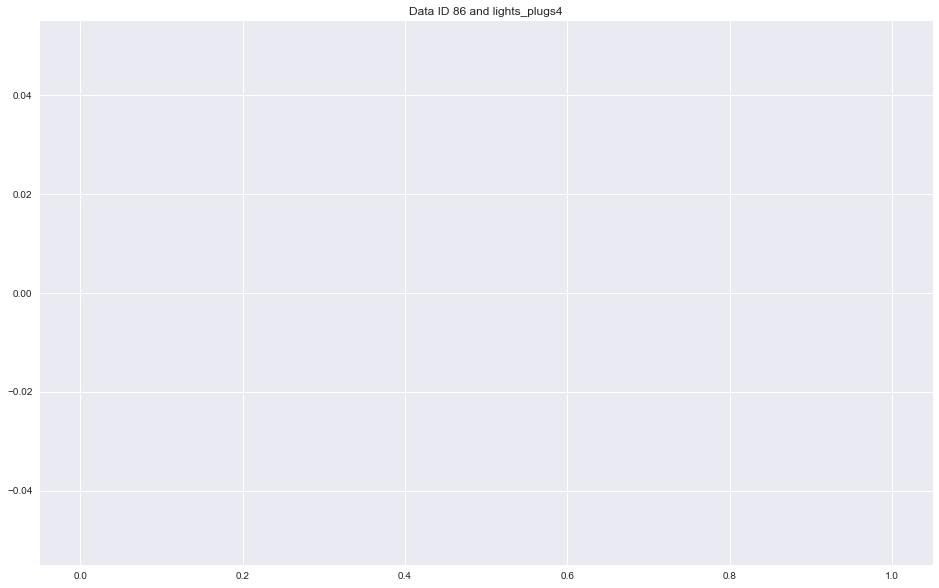

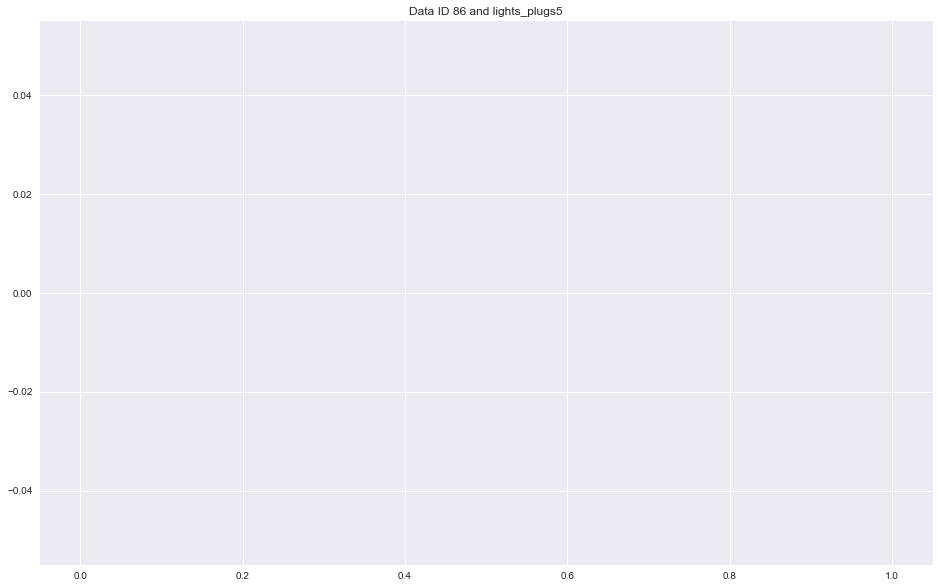

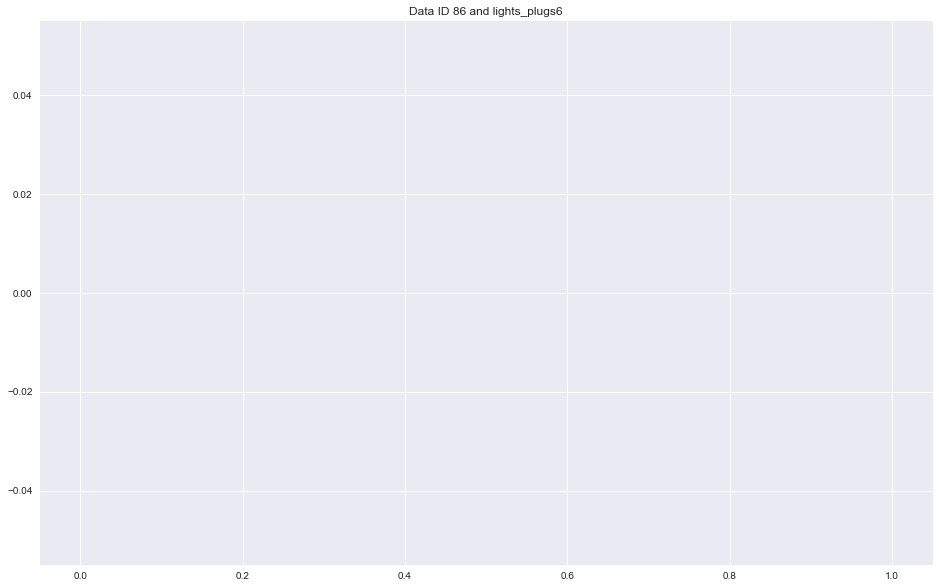

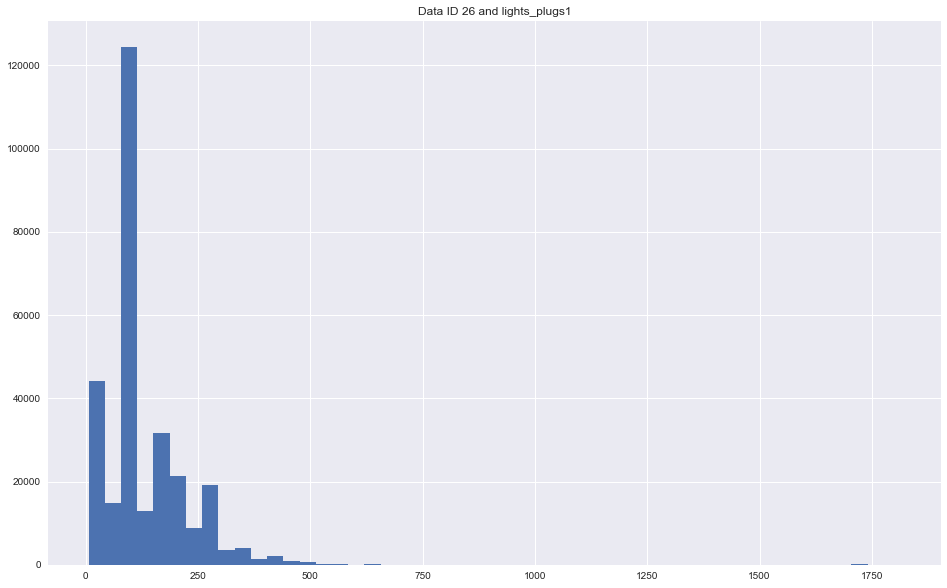

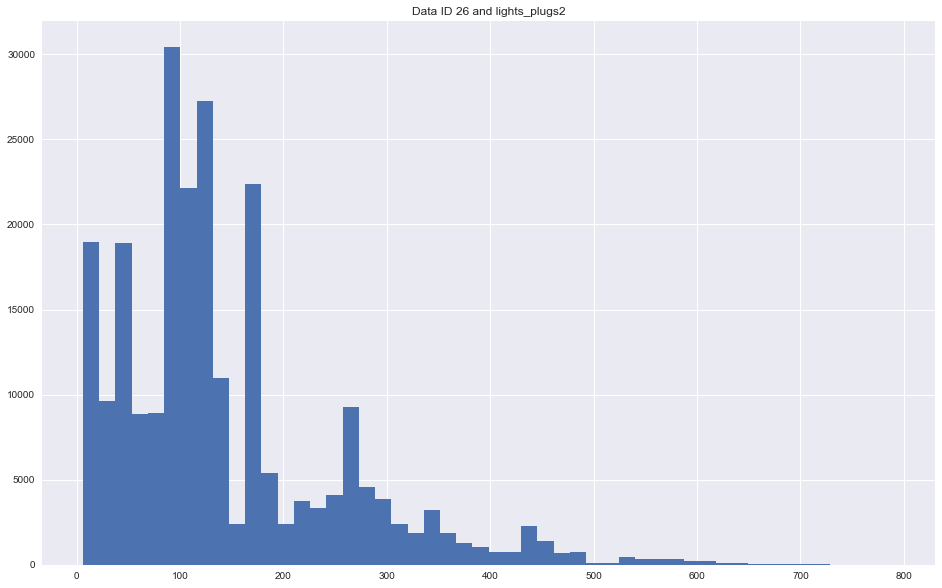

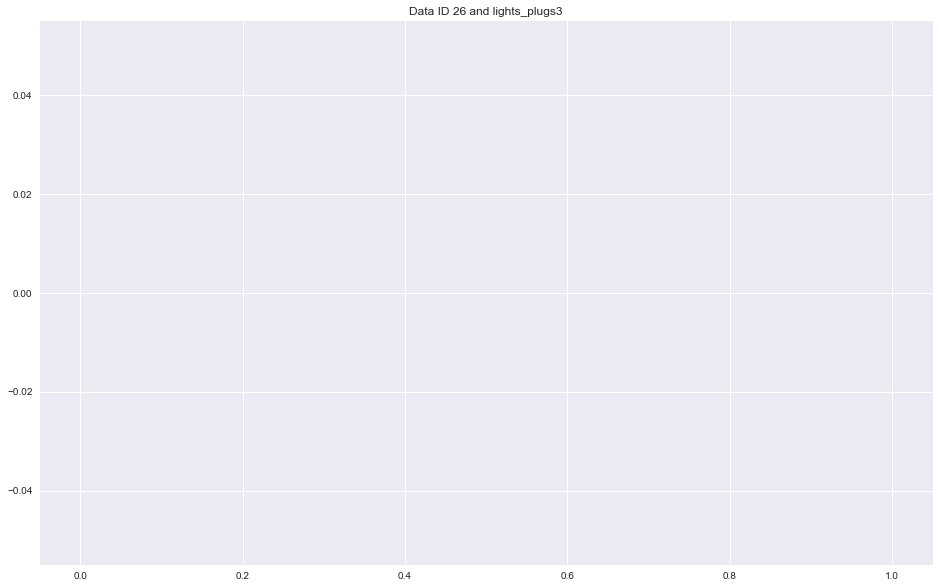

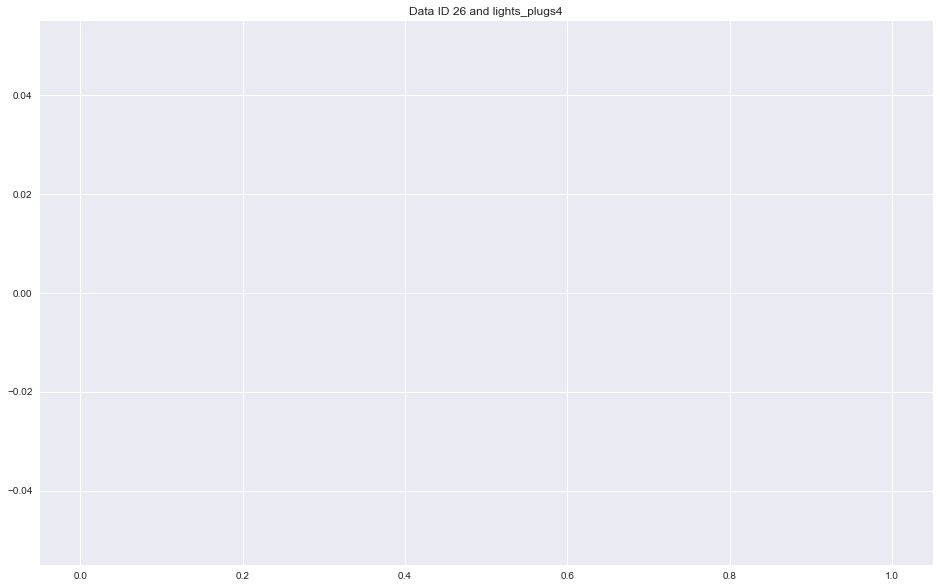

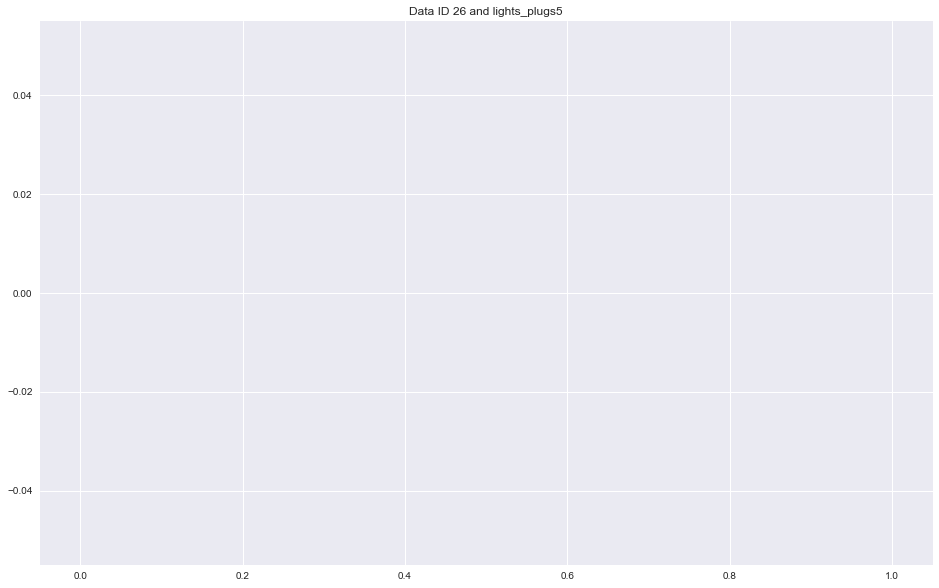

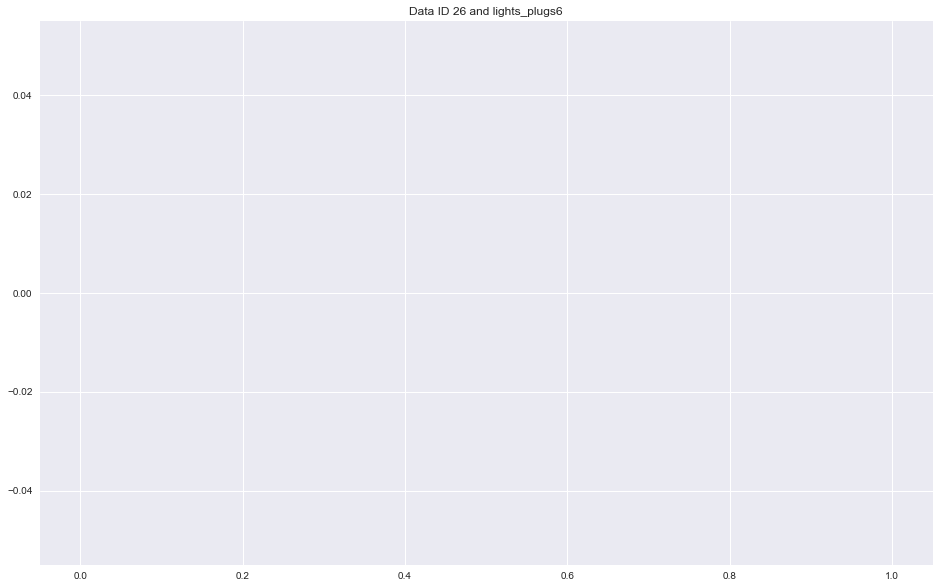

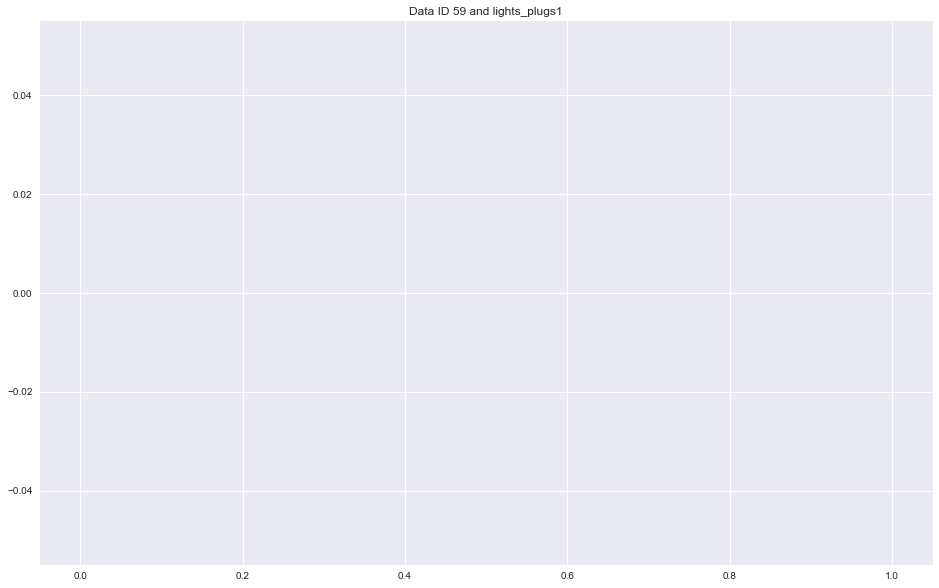

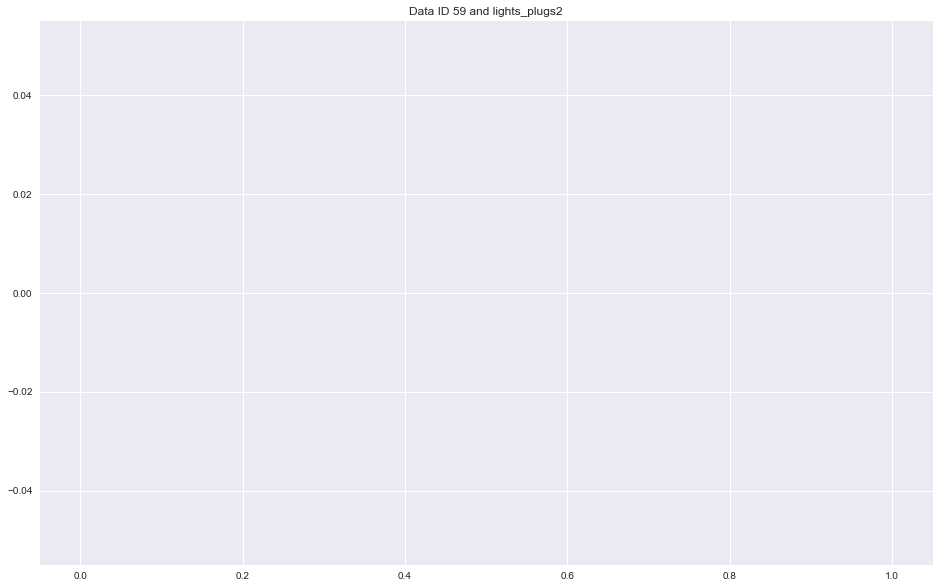

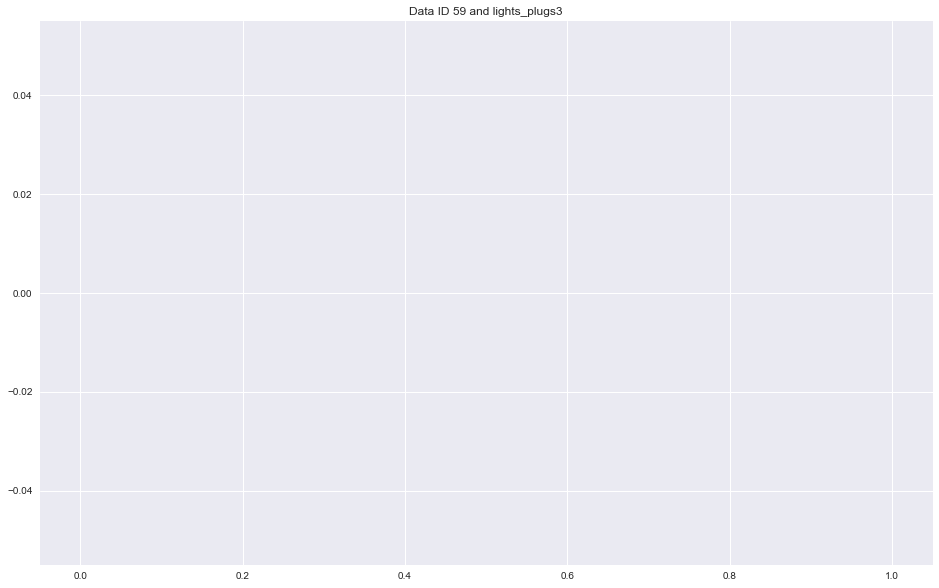

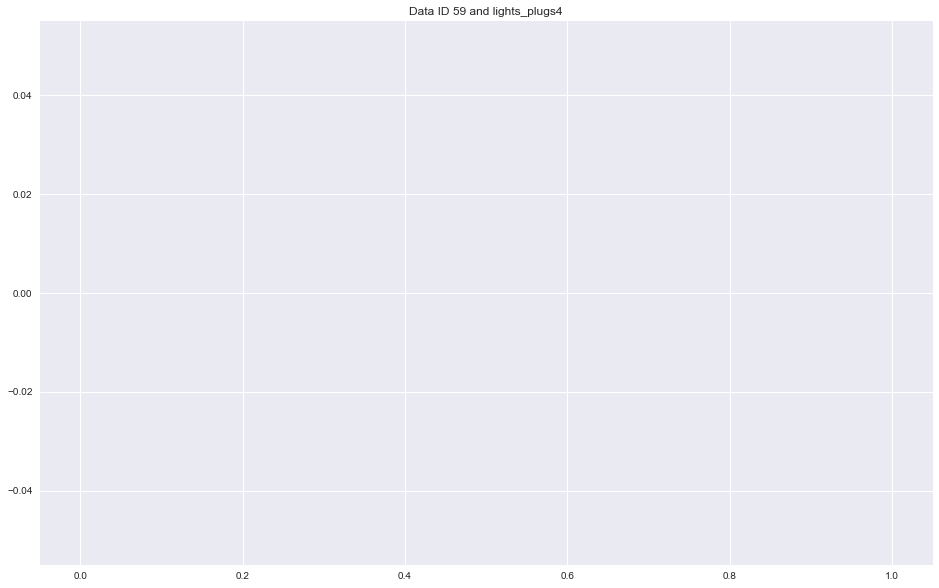

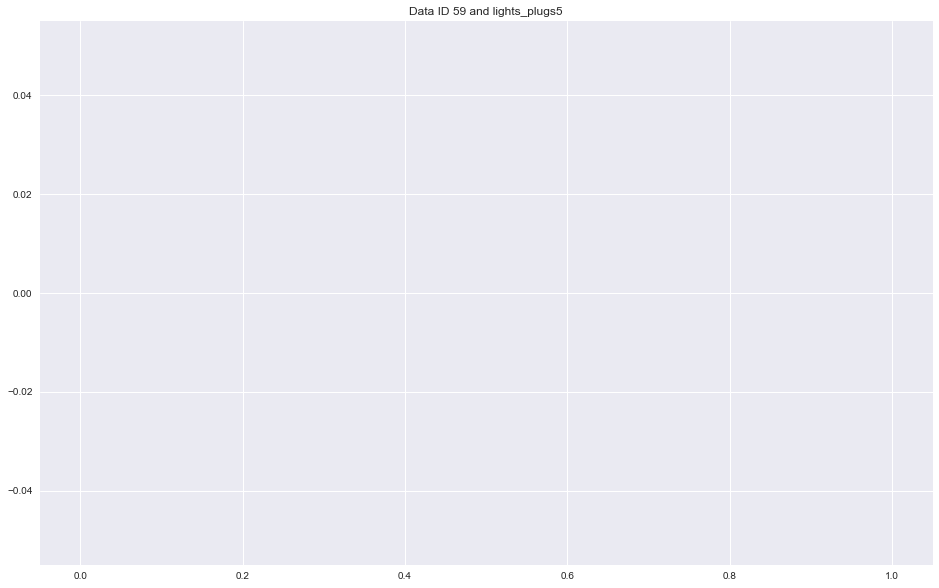

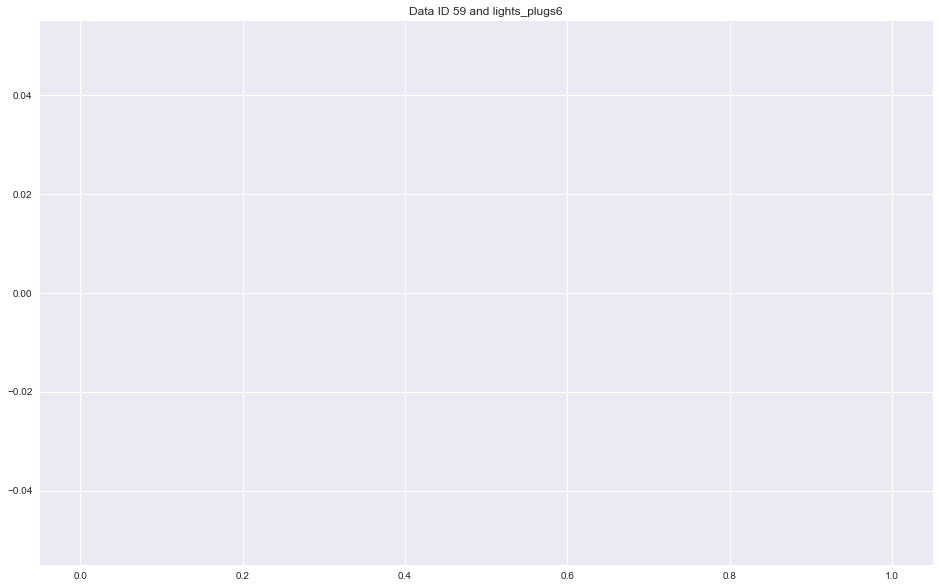

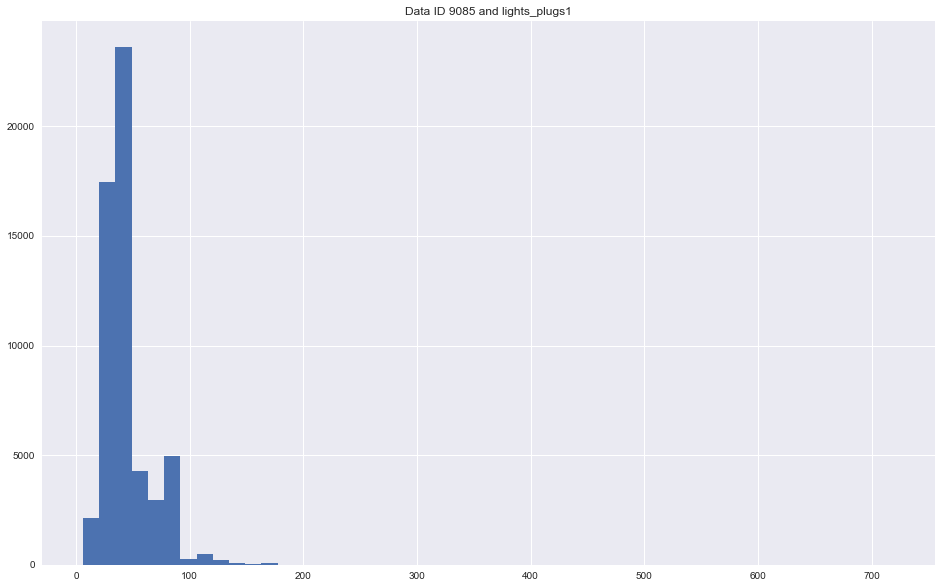

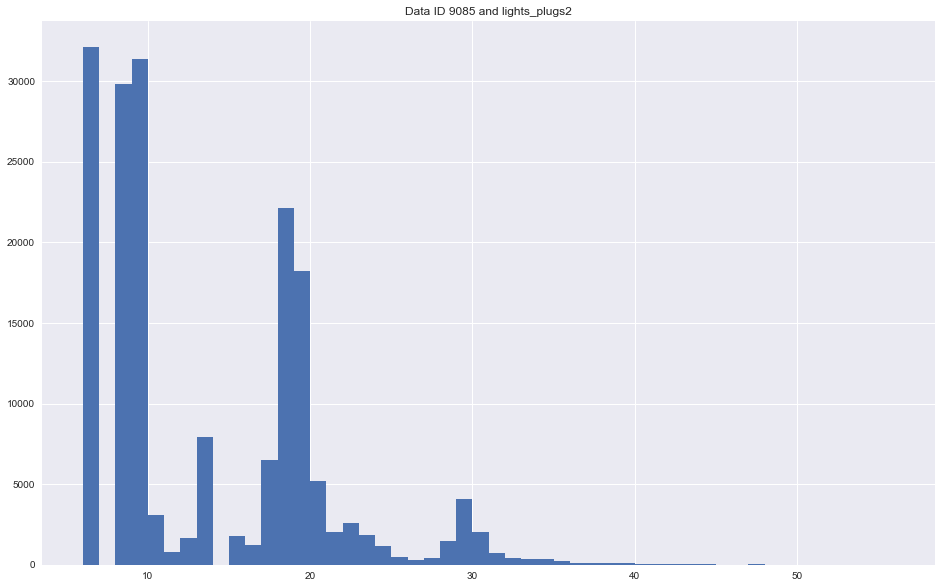

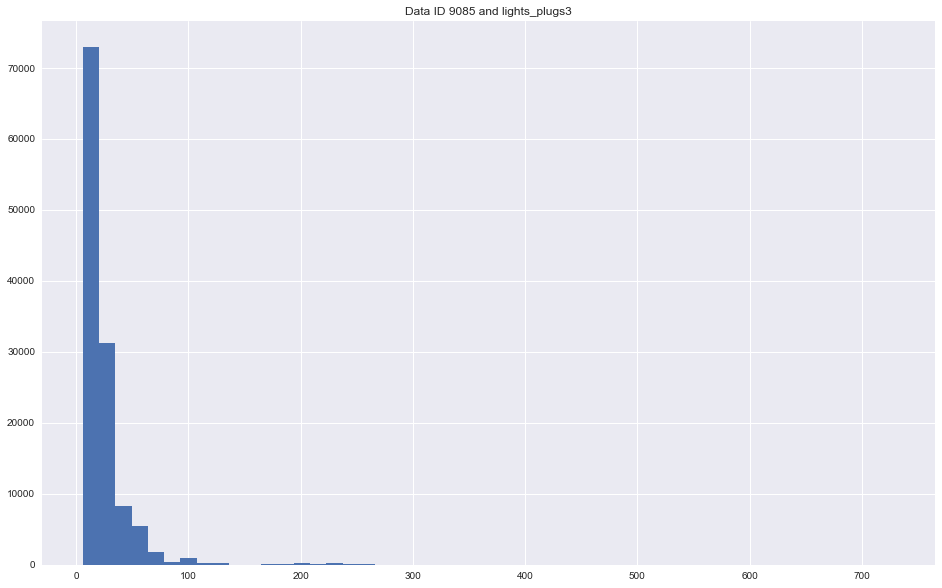

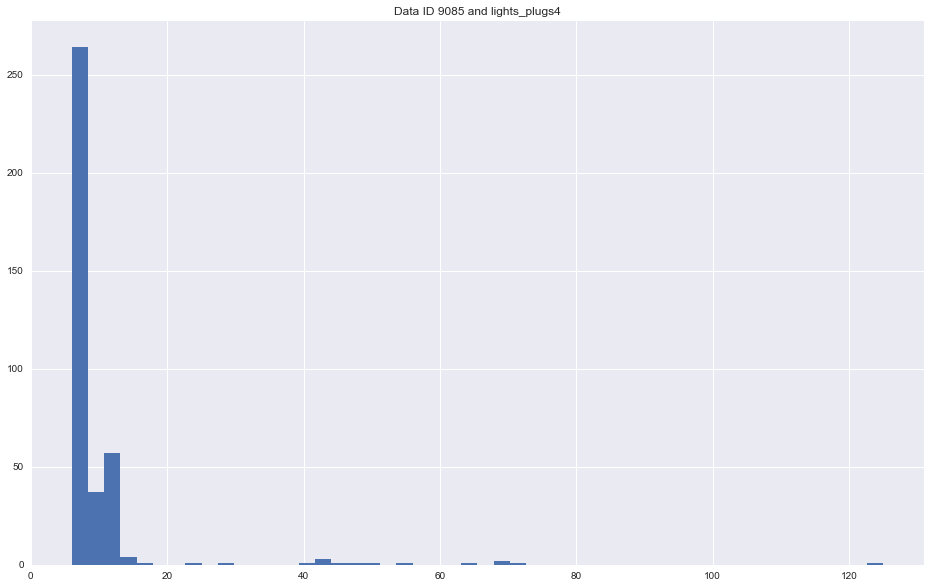

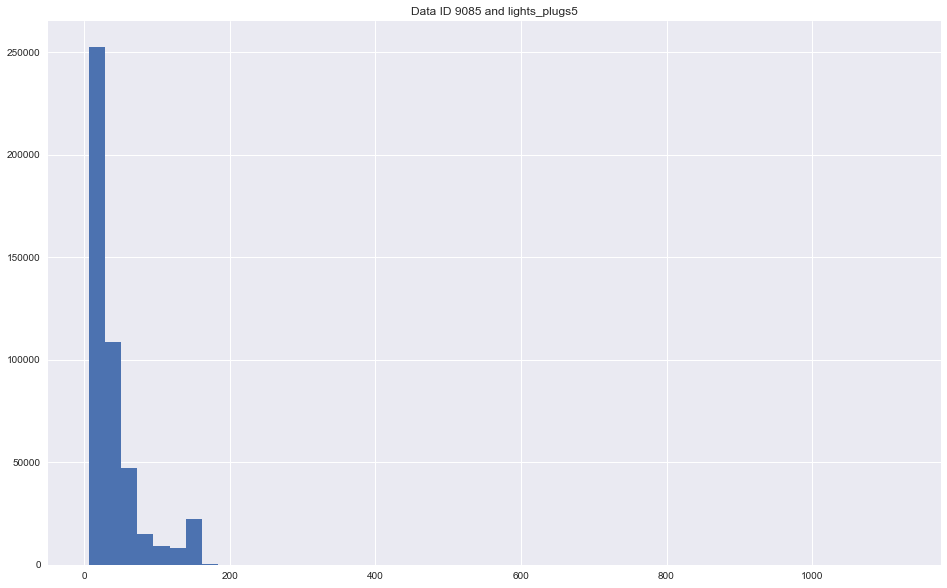

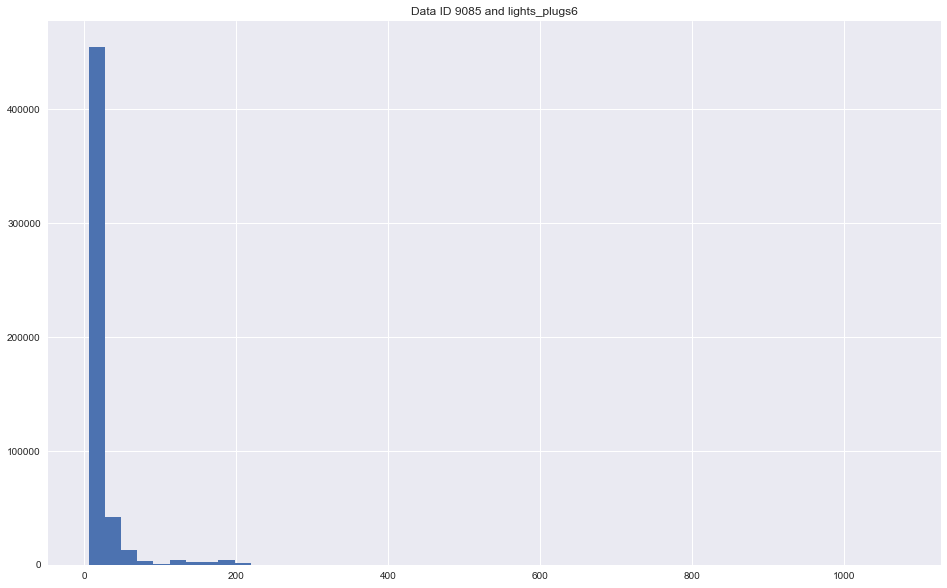

In [26]:
light_cols = ['lights_plugs1','lights_plugs2','lights_plugs3','lights_plugs4','lights_plugs5','lights_plugs6']
min_threshold = 5 # Minimum power to filter out

for data_id in set(df.dataid):
    for light_col in light_cols:
        plot_hist(df, data_id, light_col, min_threshold)

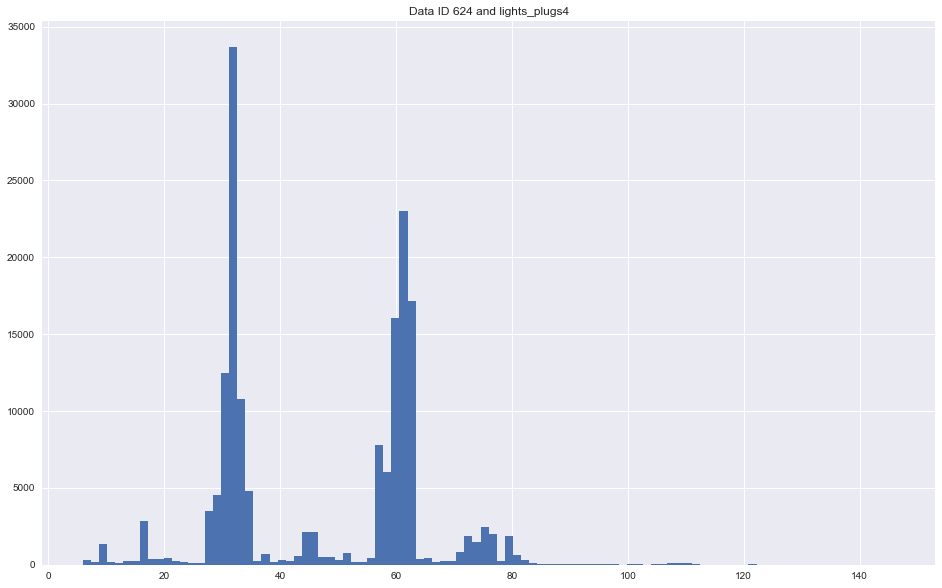

In [32]:
data_id = 624
light_col = 'lights_plugs4'
plot_hist(df, data_id, light_col, min_threshold=5, max_threshold=150, n_bin=100)

### Daily load profile of lamp and plugs circuits

In [101]:
def daily_profile_plot(df, house_id, feature, s_rate=1, min_power=50000):
    house_data = get_house_data(df, house_id, start=0, ending=-1, features=feature, sampl_rate=s_rate)
    matrix = house_data.values.reshape(367, 1440)
    max_p = [max(day) for day in matrix]
    filt_matrix = matrix[[n<min_power for n in max_p]]
    print(len(filt_matrix))
    
    fig = plt.figure(figsize=(16,10))
    plt.plot(filt_matrix.transpose(), 'k-', alpha=0.1)
    plt.title("House ID: {}, Column: {}".format(house_id, feature))

228


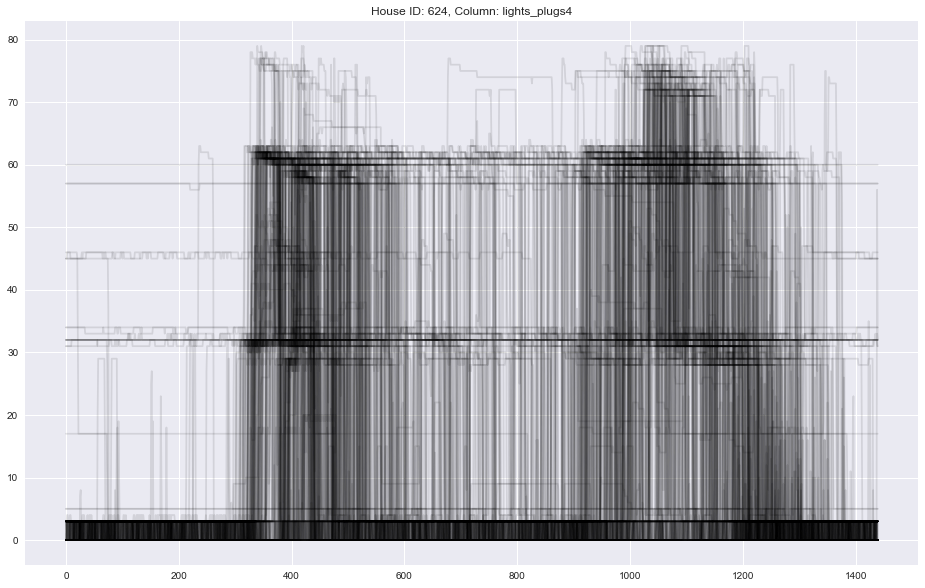

In [102]:
house_id = 624
feature = 'lights_plugs4'
daily_profile_plot(df, house_id, feature, s_rate=1, min_power=80)